# 3. Embeddings as Features

## Imports

In [54]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from gensim.downloader import load
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist 
from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer

# Processing the dataset and display number of tokens

In [2]:
with open("goemotions.json", "r") as data:
    file = pd.read_json(data)
    
emotion = file[1].value_counts().to_dict()
sentiment = file[2].value_counts().to_dict()

posts = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts)

print(f"The size of the vocabulary is {len(X.toarray()[0])}")


The size of the vocabulary is 30449


## Split the dataset

In [3]:
#get the location
emo = preprocessing.LabelEncoder()
senti = preprocessing.LabelEncoder()

#vectorizing emotions
emo = emo.fit_transform(file[1]) 
#vectorizing sentiments
senti = senti.fit_transform(file[2]) 

#now splitting the data 
X_train, X_test, Yemo_train, Yemo_test, Ysenti_train, Ysenti_test = train_test_split(X, emo, senti, test_size = 0.2, train_size=0.8)

## 3.1 Genism.downloader.load

In [4]:
model = gensim.downloader.load("word2vec-google-news-300")

## 3.2 Tokenizer from nltk

    As it is mentioned that we have to display number of tokens in the training set, we again change the size of the training set to 80% (previously we changed it to 50% for section 2.5)

In [7]:
emotion = file[1].tolist()
sentiment = file[2].tolist()

Xemb_train, Xemb_test, Yemb_emo_train, Yemb_emo_test, Yemb_senti_train, Yemb_senti_test  = train_test_split(posts, emotion, sentiment, test_size = 0.2, train_size=0.8)

In [6]:
posts_string_train = str(Xemb_train)

In [12]:
tokens = word_tokenize(posts_string_train)

In [14]:
print("There are "+str(len(tokens))+" tokens in the training set.")

There are 2444744 tokens in the training set.


## 3.3 & 3.4 Embedding of reddit posts and Hit rates
    
    

In [8]:
#post embedding for training set

train_hit_rate_lst = []  #to compute the hit rate of training set
word_embeddings = []  #contains words embedding of each post
each_post_embedding_train = [] #contains embeddings of each reddit post as average of embedding of its words (for training set)

for post in Xemb_train:
    for word in post:
        if word in model:
            train_hit_rate_lst.append(word)
            word_embeddings.append(model[word])
        
    each_post_embedding_train.append(np.mean(word_embeddings,axis=0))
    word_embeddings.clear() #This will clear the previous post embedding


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
#hit rate for training set

total_words_train = []

for post in Xemb_train:
    for word in post:
        total_words_train.append(word)

hit_rate_train = (len(train_hit_rate_lst)/len(total_words_train)) * 100
print("The hit rate of words (with Word2Vec model) in training set of reddit posts is " + str(round(hit_rate_train)) + "%.")

The hit rate of words (with Word2Vec model) in training set of reddit posts is 73%.


In [10]:
#post embedding for test set

test_hit_rate_lst = []  #to compute the hit rate of test set
word_embeddings = []  #contains words embedding of each post
each_post_embedding_test = [] #contains embeddings of each reddit post as average of embedding of its words (for test set)

for post in Xemb_test:
    for word in post:
        if word in model:
            test_hit_rate_lst.append(word)
            word_embeddings.append(model[word])
        
    each_post_embedding_test.append(np.mean(word_embeddings,axis=0))
    word_embeddings.clear() #This will clear the previous post embedding


In [11]:
#hit rate for test set

total_words_test = []

for post in Xemb_test:
    for word in post:
        total_words_test.append(word)

hit_rate_test = (len(test_hit_rate_lst)/len(total_words_test)) * 100
print("The hit rate of words (with Word2Vec model) in test set of reddit posts is " + str(round(hit_rate_test)) + "%.")

The hit rate of words (with Word2Vec model) in test set of reddit posts is 73%.


In [12]:
X_avgemb_train = each_post_embedding_train
X_avgemb_test = each_post_embedding_test

In [13]:
for i in range(len(X_avgemb_train)):
    if i >= len(X_avgemb_train):
        break
    if X_avgemb_train[i].shape == (300,):
        continue
    else:
        X_avgemb_train.pop(i)
        Yemb_emo_train = np.delete(Yemb_emo_train, i)
        Yemb_senti_train = np.delete(Yemb_senti_train, i)


for i in range(len(X_avgemb_test)):
    if i >= len(X_avgemb_test):
        break
    if X_avgemb_test[i].shape == (300,):
        continue
    else:
        X_avgemb_test.pop(i)
        Yemb_emo_test = np.delete(Yemb_emo_test, i)
        Yemb_senti_test = np.delete(Yemb_senti_test, i)


In [14]:
for i in range(len(X_avgemb_train)):
    X_avgemb_train[i] = np.array(X_avgemb_train[i])

for i in range(len(X_avgemb_test)):
    X_avgemb_test[i] = np.array(X_avgemb_test[i])
    
print(f"Shape of training set: {np.shape(X_avgemb_train)}")
print(f"Shape of test set: {np.shape(X_avgemb_test)}")
print(np.shape(Yemb_emo_test))

Shape of training set: (137452, 300)
Shape of test set: (34363, 300)
(34363,)


## 3.5 Base-MLP

In [27]:
clf_obj = MLPClassifier(max_iter = 20)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptron with default parameters for emotions.



/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.42      0.03      0.06      2044
     amusement       0.40      0.04      0.07      1225
         anger       0.55      0.03      0.05      1038
     annoyance       0.00      0.00      0.00      1618
      approval       0.50      0.00      0.00      2213
        caring       0.00      0.00      0.00       748
     confusion       0.00      0.00      0.00       988
     curiosity       0.23      0.01      0.01      1190
        desire       0.00      0.00      0.00       436
disappointment       0.00      0.00      0.00       954
   disapproval       0.50      0.00      0.01      1541
       disgust       0.00      0.00      0.00       566
 embarrassment       0.00      0.00      0.00       308
    excitement       0.00      0.00      0.00       598
          fear       0.00      0.00      0.00       356
     gratitude       0.69      0.39      0.50      1379
         grief       0.00      0.00      0.00  

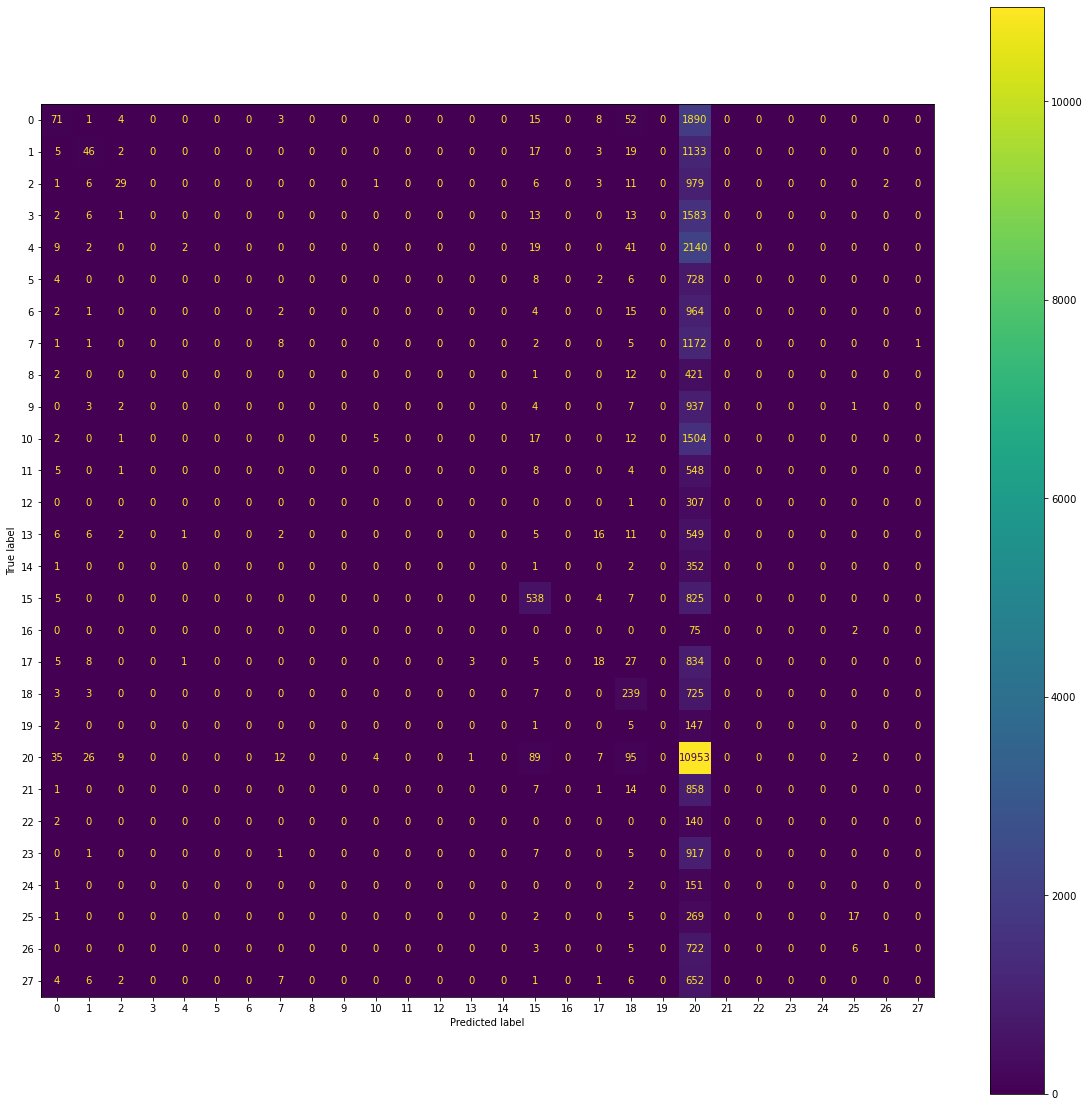

In [28]:
clf_obj.fit(X_avgemb_train,Yemb_emo_train)#training the data of emotions

pred = clf_obj.predict(X_avgemb_test)

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(Yemb_emo_test, pred)) 
cm = confusion_matrix(Yemb_emo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptron with default parameters for emotions.

              precision    recall  f1-score   support

   ambiguous       0.42      0.02      0.04      3788
    negative       0.33      0.22      0.27      7644
     neutral       0.40      0.43      0.42     11233
    positive       0.44      0.63      0.52     11698

    accuracy                           0.41     34363
   macro avg       0.40      0.33      0.31     34363
weighted avg       0.40      0.41      0.38     34363



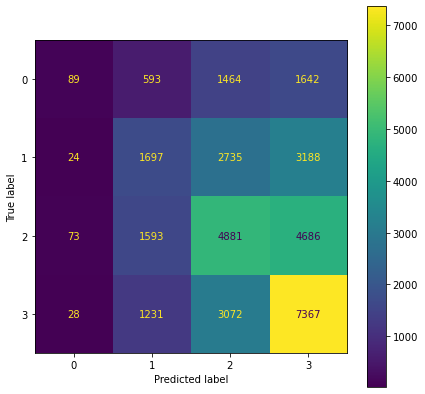

In [29]:
clf_obj.fit(X_avgemb_train,Yemb_senti_train) #training the data of senti

pred = clf_obj.predict(X_avgemb_test)

print("The performance of Multilayer Perceptron with default parameters for sentiment.\n")
print(classification_report(Yemb_senti_test, pred)) 
cm = confusion_matrix(Yemb_senti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 

## 3.6 Top MLP 

In [30]:
param_grid=[
    { 'activation': ['logistic','tanh','relu','identity'], 'hidden_layer_sizes':[(30,50),(10,10,10)], 'solver':['adam','sgd']}
]


In [31]:
#training the data of emotions using GridSearchCV
grid_search = GridSearchCV(clf_obj, param_grid,n_jobs=-1,scoring='f1_weighted').fit(X_avgemb_train,Yemb_emo_train)
print("The best parameter is:  ")
print(grid_search.best_params_)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/l

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/l

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/l

The best parameter is:  
{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.38      0.02      0.05      2044
     amusement       0.35      0.04      0.08      1225
         anger       0.47      0.02      0.04      1038
     annoyance       0.00      0.00      0.00      1618
      approval       0.00      0.00      0.00      2213
        caring       0.00      0.00      0.00       748
     confusion       0.00      0.00      0.00       988
     curiosity       0.27      0.01      0.01      1190
        desire       0.00      0.00      0.00       436
disappointment       0.00      0.00      0.00       954
   disapproval       0.70      0.00      0.01      1541
       disgust       0.00      0.00      0.00       566
 embarrassment       0.00      0.00      0.00       308
    excitement       1.00      0.00      0.00       598
          fear       0.00      0.00      0.00       356
     gratitude       0.55      0.47      0.50      1379
         grief       0.00      0.00      0.00  

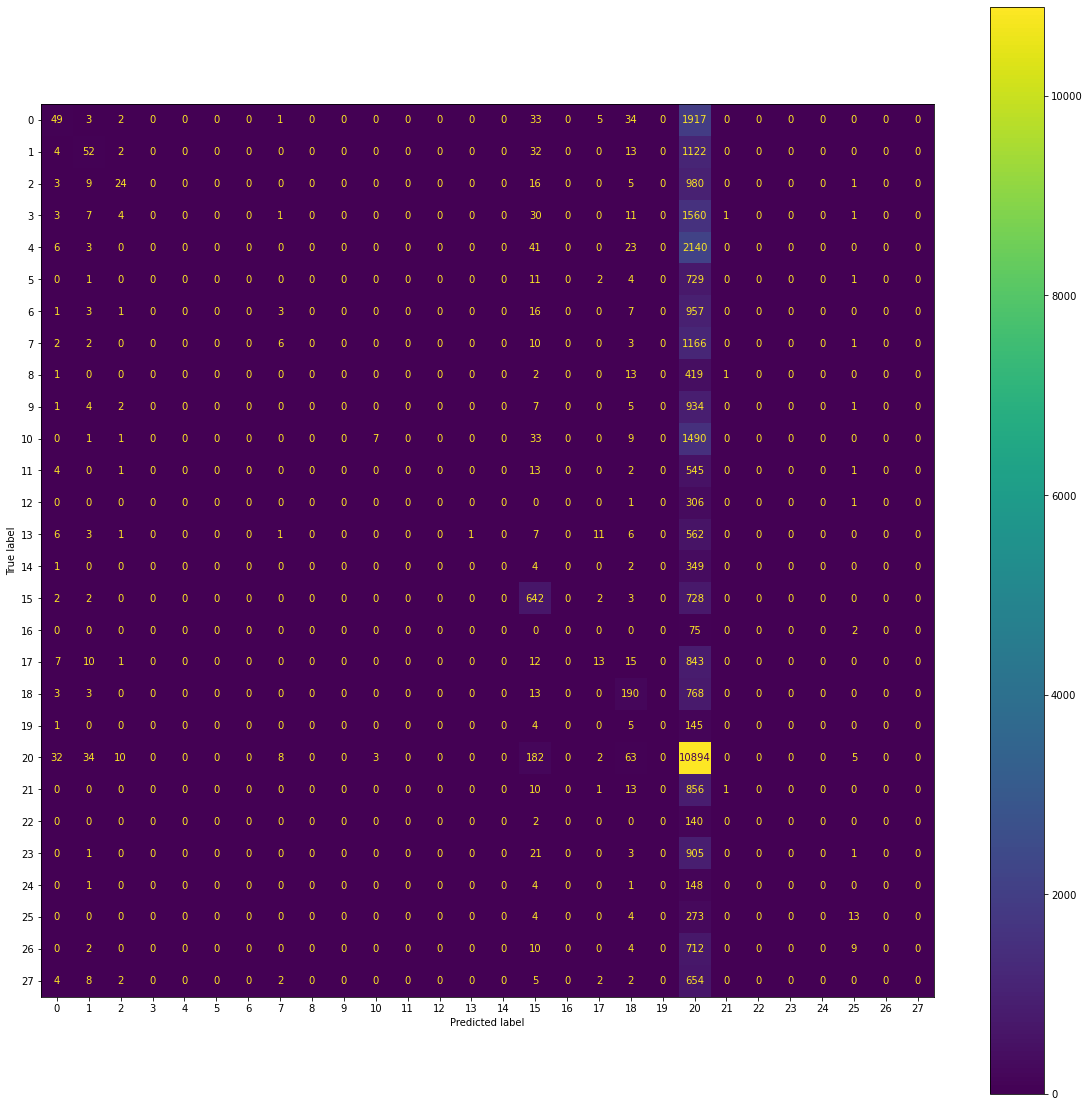

In [32]:
pred = grid_search.predict(X_avgemb_test)

print(classification_report(Yemb_emo_test, pred))

cm = confusion_matrix(Yemb_emo_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

In [33]:
#training the data of sentiments using GridSearchCV
grid_search = GridSearchCV(clf_obj, param_grid, scoring='f1_weighted').fit(X_avgemb_train,Yemb_senti_train)
print("The best parameter is:  ")
print(grid_search.best_params_)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/l

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/l

The best parameter is:  
{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

   ambiguous       0.44      0.03      0.05      3788
    negative       0.43      0.04      0.07      7644
     neutral       0.39      0.47      0.42     11233
    positive       0.41      0.71      0.52     11698

    accuracy                           0.40     34363
   macro avg       0.42      0.31      0.27     34363
weighted avg       0.41      0.40      0.34     34363



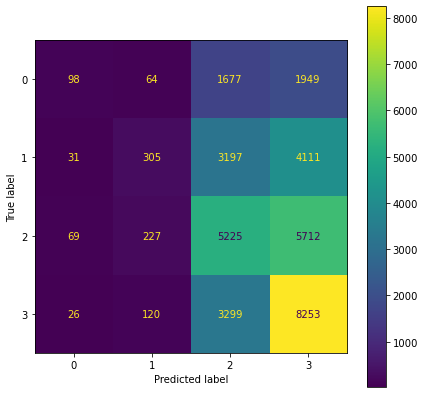

In [34]:
pred = grid_search.predict(X_avgemb_test)

print(classification_report(Yemb_senti_test, pred))

cm = confusion_matrix(Yemb_senti_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 

# 3.8 Re-runs with 2 other pre-trained models
    We compared the top mlp and base mlp above and found out that base mlp has better score than top mlp, therefore we are using base mlp for the 2 pre-trained models.

In [24]:
model1 = gensim.downloader.load("glove-twitter-25")
model2 = gensim.downloader.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 104.8/104.8MB downloaded
[==================================================] 100.0% 128.1/128.1MB downloaded


In [66]:
Xemb_train, Xemb_test, Yemb_emo_train, Yemb_emo_test, Yemb_senti_train, Yemb_senti_test  = train_test_split(posts, emotion, sentiment, test_size = 0.2, train_size=0.8)

## Model1: glove-twitter-25

In [67]:
word_embeddings = []  #contains words embedding of each post
each_post_embedding_train = [] #contains embeddings of each reddit post as average of embedding of its words (for training set)

for post in Xemb_train:
    for word in post:
        if word in model1:
            word_embeddings.append(model1[word])
        
    each_post_embedding_train.append(np.mean(word_embeddings,axis=0))
    word_embeddings.clear() #This will clear the previous post embedding

In [68]:
word_embeddings = []  #contains words embedding of each post
each_post_embedding_test = [] #contains embeddings of each reddit post as average of embedding of its words (for training set)

for post in Xemb_test:
    for word in post:
        if word in model1:
            word_embeddings.append(model1[word])
        
    each_post_embedding_test.append(np.mean(word_embeddings,axis=0))
    word_embeddings.clear() #This will clear the previous post embedding

In [69]:
X_avgemb_train = each_post_embedding_train
X_avgemb_test = each_post_embedding_test

In [71]:
for i in range(len(X_avgemb_train)):
    if i >= len(X_avgemb_train):
        break
    if X_avgemb_train[i].shape == (25, ):
        continue
    else:
        X_avgemb_train.pop(i)
        Yemb_emo_train = np.delete(Yemb_emo_train, i)
        Yemb_senti_train = np.delete(Yemb_senti_train, i)


for i in range(len(X_avgemb_test)):
    if i >= len(X_avgemb_test):
        break
    if X_avgemb_test[i].shape == (25, ):
        continue
    else:
        X_avgemb_test.pop(i)
        Yemb_emo_test = np.delete(Yemb_emo_test, i)
        Yemb_senti_test = np.delete(Yemb_senti_test, i)

In [72]:
for i in range(len(X_avgemb_train)):
    X_avgemb_train[i] = np.array(X_avgemb_train[i])

for i in range(len(X_avgemb_test)):
    X_avgemb_test[i] = np.array(X_avgemb_test[i])
    
print(f"Shape of training set: {np.shape(X_avgemb_train)}")
print(f"Shape of test set: {np.shape(X_avgemb_test)}")
print(np.shape(Yemb_emo_test))

Shape of training set: (136972, 25)
Shape of test set: (34261, 25)
(34261,)


In [77]:
clf_obj = MLPClassifier()

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptron with default parameters for emotions.



/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.38      0.04      0.08      2079
     amusement       0.33      0.03      0.05      1235
         anger       0.30      0.02      0.04       965
     annoyance       0.00      0.00      0.00      1706
      approval       0.00      0.00      0.00      2220
        caring       0.33      0.00      0.00       716
     confusion       0.00      0.00      0.00       975
     curiosity       0.30      0.14      0.19      1176
        desire       0.33      0.00      0.00       454
disappointment       0.00      0.00      0.00       944
   disapproval       0.29      0.00      0.01      1547
       disgust       0.62      0.01      0.02       554
 embarrassment       0.00      0.00      0.00       301
    excitement       0.38      0.02      0.03       624
          fear       0.00      0.00      0.00       357
     gratitude       0.48      0.38      0.42      1373
         grief       0.00      0.00      0.00  

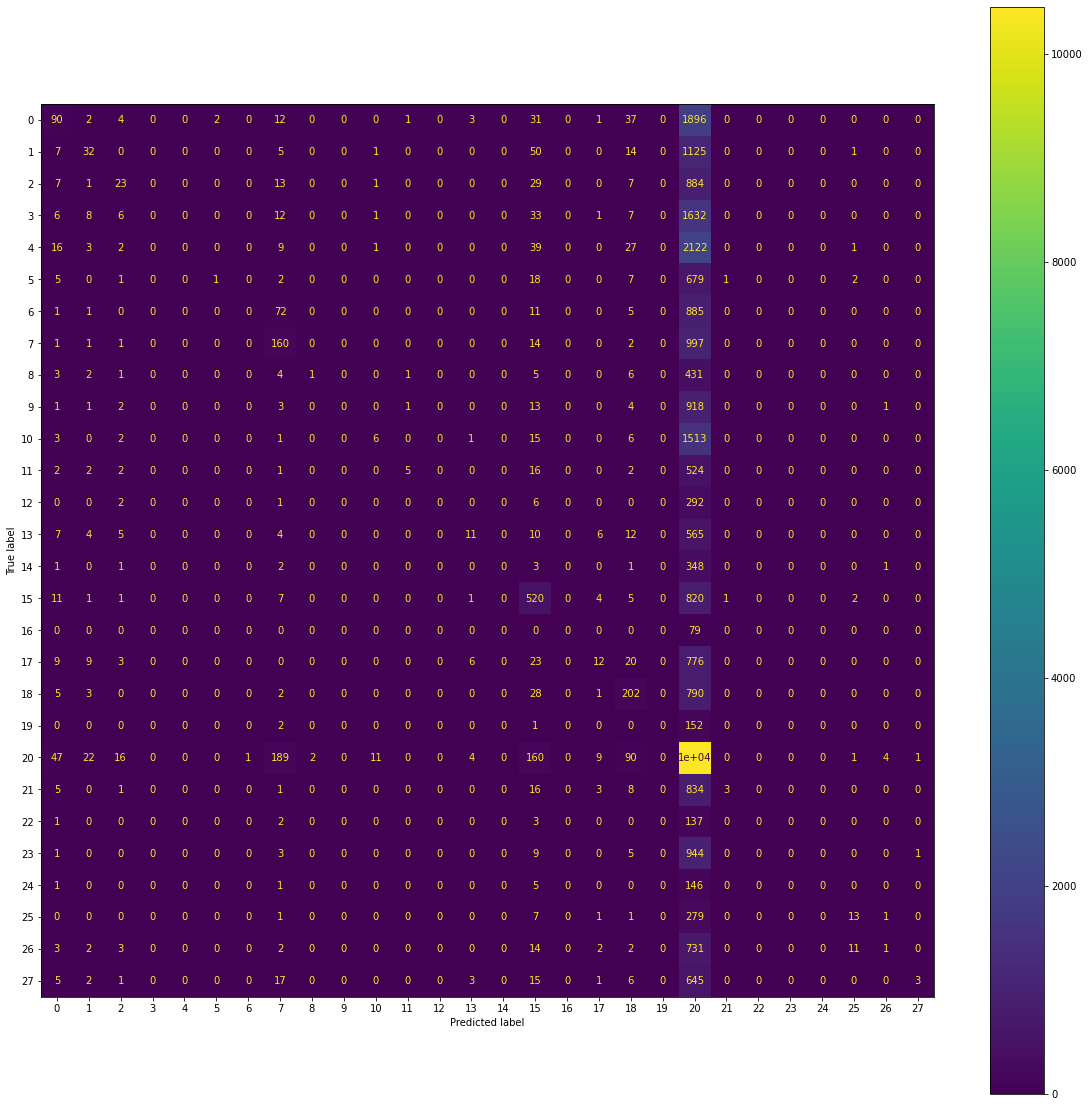

In [78]:
clf_obj.fit(X_avgemb_train,Yemb_emo_train)#training the data of emotions

pred = clf_obj.predict(X_avgemb_test)

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(Yemb_emo_test, pred)) 
cm = confusion_matrix(Yemb_emo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

The performance of Multilayer Perceptron with default parameters for emotions.

              precision    recall  f1-score   support

   ambiguous       0.42      0.11      0.18      3812
    negative       0.36      0.12      0.19      7682
     neutral       0.37      0.40      0.39     11010
    positive       0.42      0.67      0.51     11757

    accuracy                           0.40     34261
   macro avg       0.39      0.33      0.32     34261
weighted avg       0.39      0.40      0.36     34261



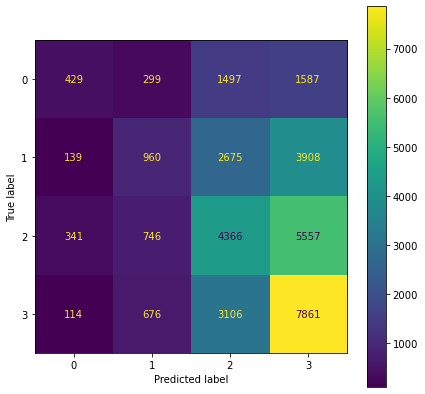

In [84]:
clf_obj.fit(X_avgemb_train,Yemb_senti_train) #training the data of senti

pred = clf_obj.predict(X_avgemb_test)

print("The performance of Multilayer Perceptron with default parameters for sentiment.\n")
print(classification_report(Yemb_senti_test, pred)) 
cm = confusion_matrix(Yemb_senti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

## Model2: glove-wiki-gigaword-100

In [89]:
Xemb_train, Xemb_test, Yemb_emo_train, Yemb_emo_test, Yemb_senti_train, Yemb_senti_test  = train_test_split(posts, emotion, sentiment, test_size = 0.2, train_size=0.8)

In [90]:
word_embeddings = []  #contains words embedding of each post
each_post_embedding_train = [] #contains embeddings of each reddit post as average of embedding of its words (for training set)

for post in Xemb_train:
    for word in post:
        if word in model2:
            word_embeddings.append(model2[word])
        
    each_post_embedding_train.append(np.mean(word_embeddings,axis=0))
    word_embeddings.clear() #This will clear the previous post embedding

In [91]:
word_embeddings = []  #contains words embedding of each post
each_post_embedding_test = [] #contains embeddings of each reddit post as average of embedding of its words (for training set)

for post in Xemb_test:
    for word in post:
        if word in model2:
            word_embeddings.append(model2[word])
        
    each_post_embedding_test.append(np.mean(word_embeddings,axis=0))
    word_embeddings.clear() #This will clear the previous post embedding

In [92]:
X_avgemb_train = each_post_embedding_train
X_avgemb_test = each_post_embedding_test

In [100]:
for i in range(len(X_avgemb_train)):
    if i >= len(X_avgemb_train):
        break
    if X_avgemb_train[i].shape == (100,):
        continue
    else:
        X_avgemb_train.pop(i)
        Yemb_emo_train = np.delete(Yemb_emo_train, i)
        Yemb_senti_train = np.delete(Yemb_senti_train, i)


for i in range(len(X_avgemb_test)):
    if i >= len(X_avgemb_test):
        break
    if X_avgemb_test[i].shape == (100,):
        continue
    else:
        X_avgemb_test.pop(i)
        Yemb_emo_test = np.delete(Yemb_emo_test, i)
        Yemb_senti_test = np.delete(Yemb_senti_test, i)

In [101]:
for i in range(len(X_avgemb_train)):
    X_avgemb_train[i] = np.array(X_avgemb_train[i])

for i in range(len(X_avgemb_test)):
    X_avgemb_test[i] = np.array(X_avgemb_test[i])
    
print(f"Shape of training set: {np.shape(X_avgemb_train)}")
print(f"Shape of test set: {np.shape(X_avgemb_test)}")
print(np.shape(Yemb_emo_test))

Shape of training set: (136992, 100)
Shape of test set: (34245, 100)
(34245,)


In [116]:
clf_obj = MLPClassifier(max_iter=50)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptron with default parameters for emotions.



/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.42      0.05      0.09      2057
     amusement       0.38      0.05      0.09      1250
         anger       0.52      0.04      0.07      1018
     annoyance       0.00      0.00      0.00      1691
      approval       1.00      0.00      0.00      2227
        caring       0.00      0.00      0.00       716
     confusion       0.07      0.00      0.00       996
     curiosity       0.30      0.35      0.32      1131
        desire       0.00      0.00      0.00       443
disappointment       0.00      0.00      0.00       957
   disapproval       0.00      0.00      0.00      1575
       disgust       1.00      0.00      0.01       593
 embarrassment       0.00      0.00      0.00       288
    excitement       0.28      0.02      0.03       586
          fear       0.00      0.00      0.00       363
     gratitude       0.70      0.30      0.42      1364
         grief       0.00      0.00      0.00  

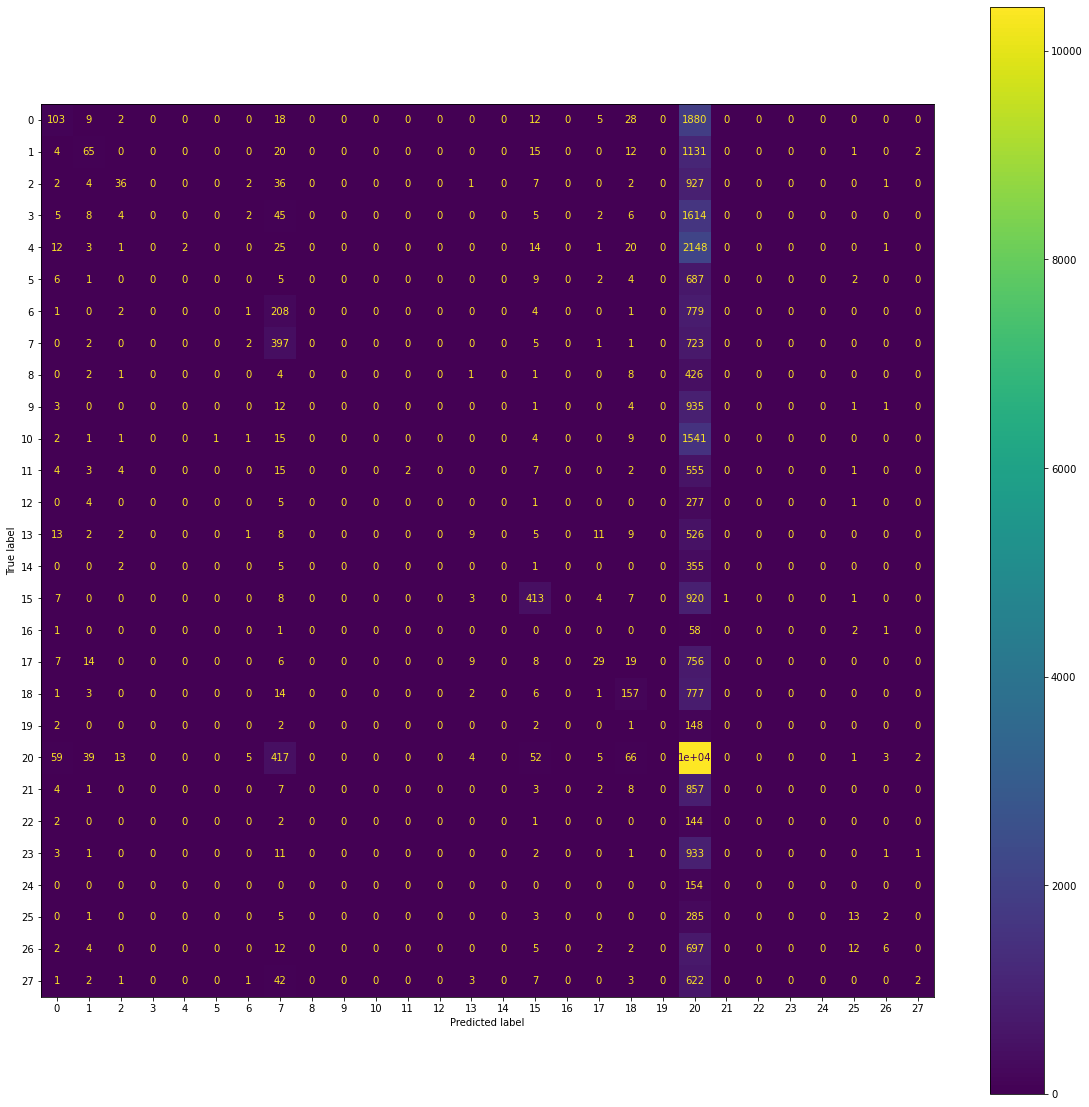

In [117]:
clf_obj.fit(X_avgemb_train,Yemb_emo_train)#training the data of emotions

pred = clf_obj.predict(X_avgemb_test)

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(Yemb_emo_test, pred)) 
cm = confusion_matrix(Yemb_emo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptron with default parameters for emotions.

              precision    recall  f1-score   support

   ambiguous       0.45      0.22      0.30      3764
    negative       0.34      0.29      0.31      7754
     neutral       0.37      0.49      0.42     11090
    positive       0.49      0.48      0.48     11637

    accuracy                           0.41     34245
   macro avg       0.42      0.37      0.38     34245
weighted avg       0.41      0.41      0.41     34245



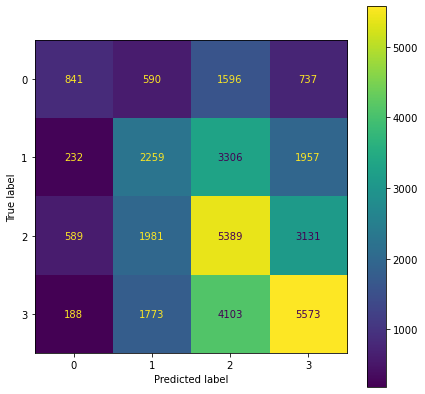

In [118]:
clf_obj.fit(X_avgemb_train,Yemb_senti_train) #training the data of senti

pred = clf_obj.predict(X_avgemb_test)

print("The performance of Multilayer Perceptron with default parameters for sentiment.\n")
print(classification_report(Yemb_senti_test, pred)) 
cm = confusion_matrix(Yemb_senti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)